#Connecting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Downloading dataset

In [3]:
!wget https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv
!ls -al

--2022-06-06 11:04:46--  https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10930 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2022-06-06 11:04:46 (101 MB/s) - ‘Social_Network_Ads.csv’ saved [10930/10930]

total 28
drwxr-xr-x 1 root root  4096 Jun  6 11:04 .
drwxr-xr-x 1 root root  4096 Jun  6 11:02 ..
drwxr-xr-x 4 root root  4096 Jun  1 13:49 .config
drwxr-xr-x 1 root root  4096 Jun  1 13:50 sample_data
-rw-r--r-- 1 root root 10930 Jun  6 11:04 Social_Network_Ad

In [4]:
original_data = pd.read_csv('Social_Network_Ads.csv')
original_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#Dataset analysis

In [5]:
original_data.duplicated().sum()

0

In [6]:
original_data.isna().sum(axis = 0)  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
print(f'Dataset shape: {original_data.shape}')
print('Classes:')
print(original_data['Purchased'].unique())

Dataset shape: (400, 5)
Classes:
[0 1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


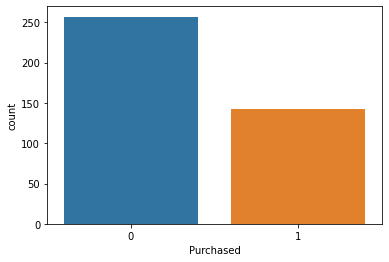

In [8]:
seaborn.countplot(original_data['Purchased'], label = 'Count')

#One-hot encoding

In [9]:
data = pd.get_dummies(original_data)
data.drop(columns = ['User ID'], inplace = True)

data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


#Standardization

In [10]:
Gender_Female = data['Gender_Female']
Gender_Male = data['Gender_Male']
Purchased = data['Purchased']

data.drop(columns = ['Purchased', 'Gender_Female', 'Gender_Male'], inplace = True)

scaler = StandardScaler()
scaler.fit(data)
data_standardized_matrix = scaler.transform(data)

data_standardized = pd.DataFrame(data_standardized_matrix, columns = ['Age', 'EstimatedSalary'])
data_standardized['Purchased'] = Purchased
data_standardized['Gender_Female'] = Gender_Female
data_standardized['Gender_Male'] = Gender_Male

data_standardized

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,0,1
1,-0.253587,-1.460681,0,0,1
2,-1.113206,-0.785290,0,1,0
3,-1.017692,-0.374182,0,1,0
4,-1.781797,0.183751,0,0,1
...,...,...,...,...,...
395,0.797057,-0.844019,1,1,0
396,1.274623,-1.372587,1,0,1
397,1.179110,-1.460681,1,1,0
398,-0.158074,-1.078938,0,0,1


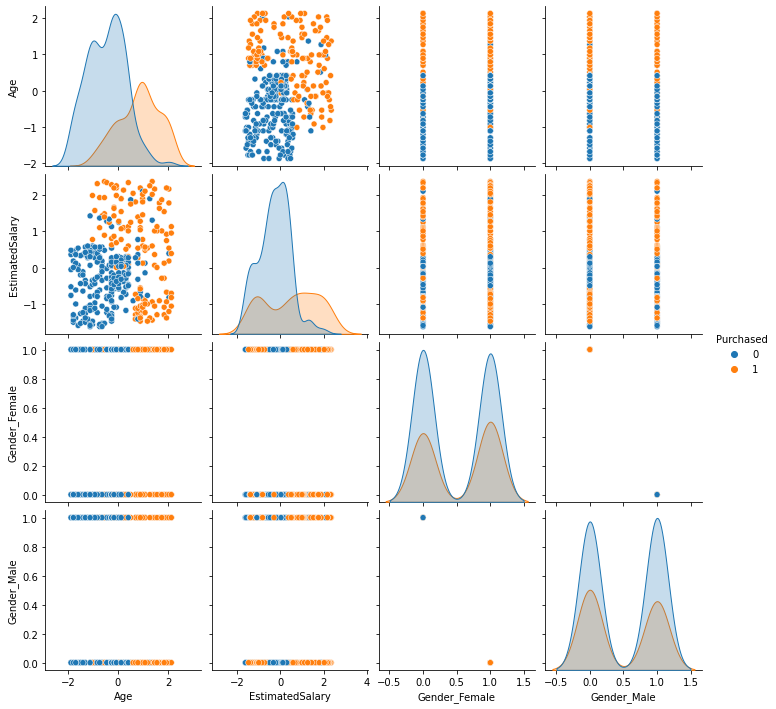

In [11]:
seaborn.pairplot(data_standardized, hue = 'Purchased')

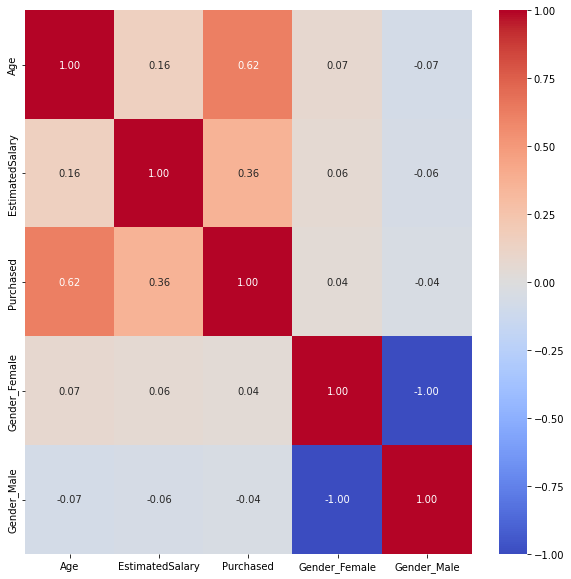

In [12]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(data_standardized.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

#Self organizing maps

In [14]:
classless_data = data_standardized.drop(columns = ['Purchased'])
classless_data

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,1
1,-0.253587,-1.460681,0,1
2,-1.113206,-0.785290,1,0
3,-1.017692,-0.374182,1,0
4,-1.781797,0.183751,0,1
...,...,...,...,...
395,0.797057,-0.844019,1,0
396,1.274623,-1.372587,0,1
397,1.179110,-1.460681,1,0
398,-0.158074,-1.078938,0,1


In [15]:
from sklearn_som.som import SOM

classless_data_numpyfied = classless_data.to_numpy()

#m, n - rectangular matrix dimensions (m * n = amount of classes)
#dim - amount of input features

my_som = SOM(m = 2, n = 1, dim = 4, random_state = 42)
my_som.fit(classless_data_numpyfied)
predictions = my_som.predict(classless_data_numpyfied)

predictions

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [16]:
classified_data = classless_data.copy()
classified_data['Purchased'] = predictions

classified_data

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,-1.781797,-1.490046,0,1,0
1,-0.253587,-1.460681,0,1,0
2,-1.113206,-0.785290,1,0,0
3,-1.017692,-0.374182,1,0,0
4,-1.781797,0.183751,0,1,1
...,...,...,...,...,...
395,0.797057,-0.844019,1,0,0
396,1.274623,-1.372587,0,1,0
397,1.179110,-1.460681,1,0,0
398,-0.158074,-1.078938,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


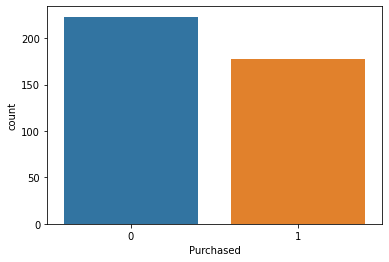

In [17]:
seaborn.countplot(classified_data['Purchased'], label = 'Count')

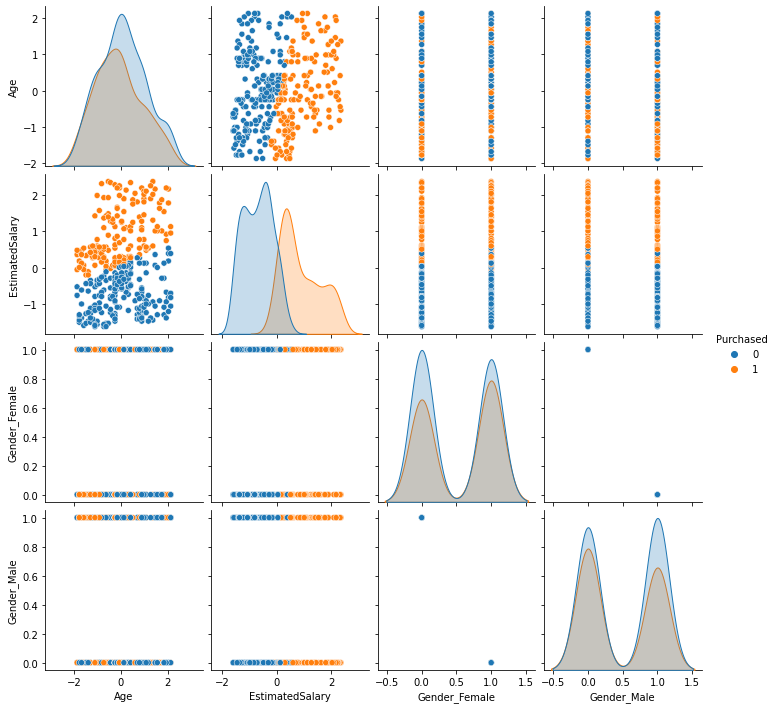

In [18]:
seaborn.pairplot(classified_data, hue = 'Purchased')

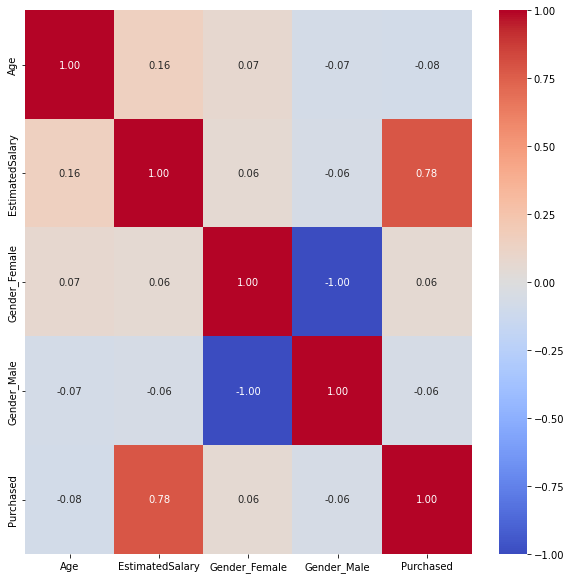

In [19]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(classified_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')